In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

def fast_plot(data, ax):
    ax.plot(data.transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

def flatten_property(peaks, property):
    flat = []
    for i in range(0, len(peaks['properties'])):
        flat.extend(peaks['properties'][i][property])
    return np.array(flat)

In [3]:
data_folder = '/Users/emiliebertholet/cernbox/coldbox_data'
peak_folder = 'data_tests'

In [28]:
filename = f'{data_folder}/adc_data_run_25036_ch_40_all.npy' # neutrons
data = np.load(filename, allow_pickle=True).astype(np.int16)
data = np.apply_along_axis(substract_peds, axis=1, arr=data)

with open(f'{peak_folder}/peaks_neutrons_wlenNone.pkl', 'rb') as file:
    wlenNone_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    wlenNone_prom500 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlen500.pkl', 'rb') as file:
    wlen500_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlen500_prom500.pkl', 'rb') as file:
    wlen500_prom500 = pickle.load(file)

print('PNS')
print(data.shape)
print('peaks_neutrons_wlenNone', len(wlenNone_prom200['flat_peak_indices']))
print('peaks_neutrons_wlenNone_prom500', len(wlenNone_prom500['flat_peak_indices']))
print('peaks_neutrons_wlen500', len(wlen500_prom200['flat_peak_indices']))
print('peaks_neutrons_wlen500_prom500', len(wlen500_prom500['flat_peak_indices']))
print(wlenNone_prom200.keys())


PNS
(16600, 65536)
peaks_neutrons_wlenNone 150242
peaks_neutrons_wlenNone_prom500 49548
peaks_neutrons_wlen500 142716
peaks_neutrons_wlen500_prom500 47676
dict_keys(['mask', 'row_peak_indices', 'properties', 'flat_peak_indices'])


Text(0.5, 1.0, 'Neutrons')

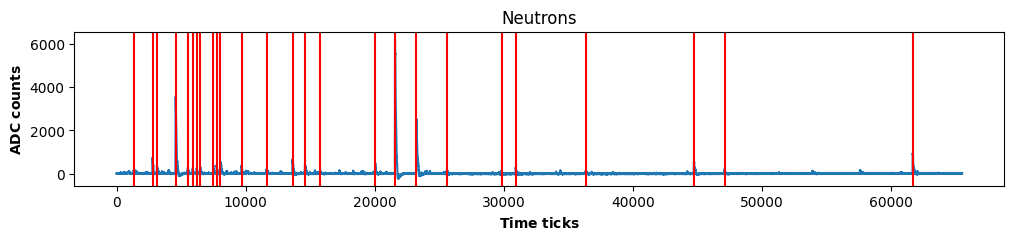

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(n_data[0], axs)
for p in n_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Neutrons')

Text(0.5, 1.0, 'Neutron Sel.')

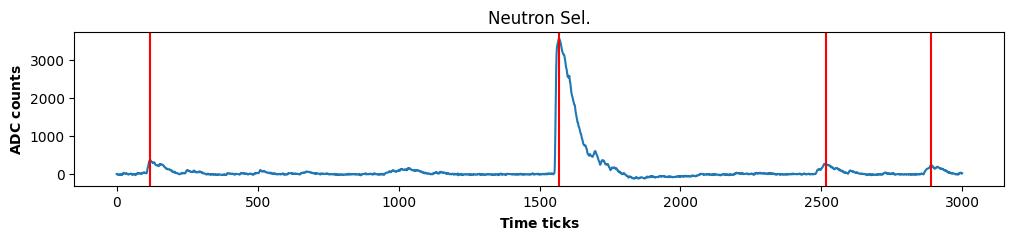

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(sn_data[0], axs)
for p in sn_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Neutron Sel.')

Text(0.5, 1.0, 'Cosmics')

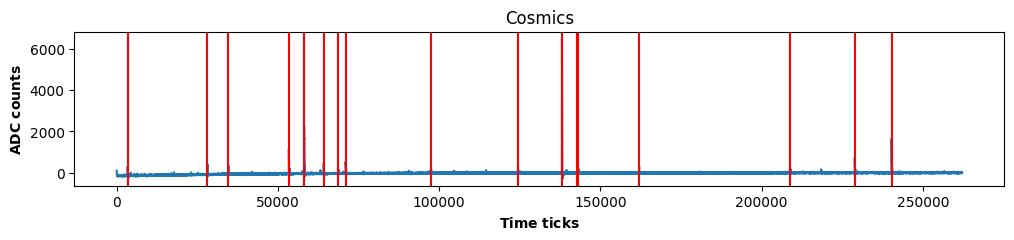

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
fast_plot(c_data[0], axs)
for p in c_peaks['row_peak_indices'][0]:
    axs.axvline(x = p, color = 'r')
axs.set_title('Cosmics')

Text(0.5, 1.0, 'Neutrons')

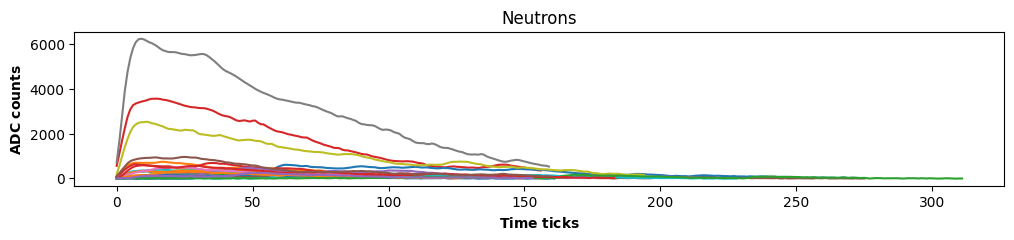

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(n_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(n_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(n_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(n_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title('Neutrons')

Text(0.5, 1.0, 'Neutron Sel')

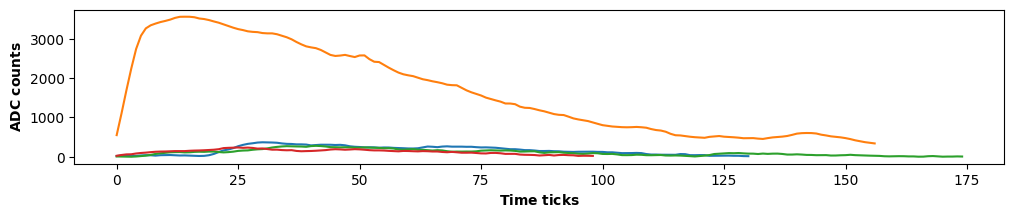

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(sn_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(sn_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(sn_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(sn_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
axs.set_title('Neutron Sel')

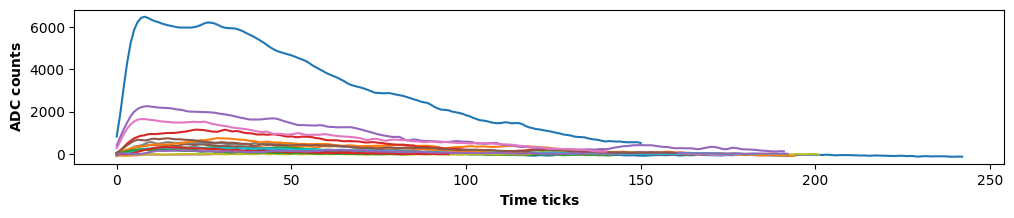

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
trigger_idx = 0
for i in np.arange(0, len(c_peaks['properties'][trigger_idx]['left_ips']), 1):
    l = int(np.ceil(c_peaks['properties'][trigger_idx]['left_ips'][i]))
    r = int(np.ceil(c_peaks['properties'][trigger_idx]['right_ips'][i]))
    ax.plot(c_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
axs.set_title('Cosmics');

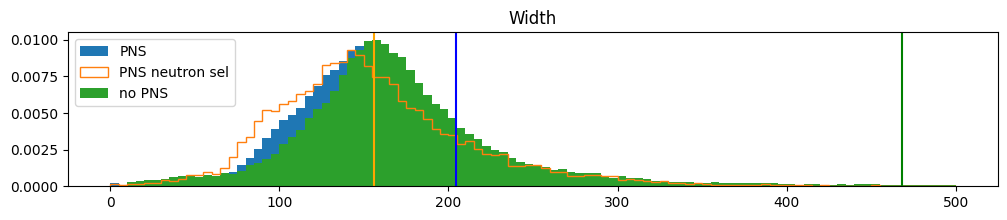

In [13]:
# rg=None
rg=(0, 500)
den=True
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
ax.hist(flatten_property(n_peaks, 'widths'), bins=100, label='PNS', range=rg, density=den);
ax.hist(flatten_property(sn_peaks, 'widths'), bins=100, label='PNS neutron sel', range=rg, histtype='step', density=den);
ax.hist(flatten_property(c_peaks, 'widths'), bins=100, label='no PNS', range=rg, density=den);

ax.axvline(x = flatten_property(n_peaks, 'widths').mean(), color = 'b');
ax.axvline(x = flatten_property(sn_peaks, 'widths').mean(), color = 'orange');
ax.axvline(x = flatten_property(c_peaks, 'widths').mean(), color = 'g');
ax.legend();
ax.set_title('Width');


In [23]:
def check_peak_width(peaks, cut=600):
    print('PEAK WIDTH')
    print(f"mean = {flatten_property(peaks, 'widths').mean():.2f}     std = {flatten_property(peaks, 'widths').std():.2f}")
    print(f"min  = {flatten_property(peaks, 'widths').min():.2f}      max = {flatten_property(peaks, 'widths').max():.2f}")
    print(f"Found {(flatten_property(peaks, 'widths')<0).sum()} negative widths  (sanity check)")
    print(f"Pecentage of entries with a width > {cut} = {(flatten_property(peaks, 'widths')>cut).sum()*100/len(flatten_property(peaks, 'widths')):.2f} %")

def check_peak_plateau(peaks, cut=2):
    print('PEAK PLATEAU')
    print(f"mean = {flatten_property(peaks, 'plateau_sizes').mean():.2f}     std = {flatten_property(peaks, 'plateau_sizes').std():.2f}")
    print(f"min  = {flatten_property(peaks, 'plateau_sizes').min():.2f}      max = {flatten_property(peaks, 'plateau_sizes').max():.2f}")
    print(f"Pecentage of entries with a plateau > {cut} = {(flatten_property(peaks, 'plateau_sizes')>cut).sum()*100/len(flatten_property(peaks, 'plateau_sizes')):.2f} %")
    

In [25]:
print('neutrons')
check_peak_width(n_peaks, cut=600)
check_peak_plateau(n_peaks, cut=2)
print('\nneutron sel')
check_peak_width(sn_peaks, cut=600)
check_peak_plateau(sn_peaks, cut=2)
print('\ncosmcis')
check_peak_width(c_peaks, cut=600)
check_peak_plateau(c_peaks, cut=2)

neutrons
PEAK WIDTH
mean = 204.68     std = 581.82
min  = 1.49      max = 15413.60
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 0.76 %
PEAK PLATEAU
mean = 2.16     std = 12.20
min  = 1.00      max = 710.00
Pecentage of entries with a plateau > 2 = 1.45 %

neutron sel
PEAK WIDTH
mean = 155.85     std = 62.46
min  = 2.26      max = 1711.22
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 0.05 %
PEAK PLATEAU
mean = 1.59     std = 8.48
min  = 1.00      max = 303.00
Pecentage of entries with a plateau > 2 = 0.88 %

cosmcis
PEAK WIDTH
mean = 468.26     std = 1621.04
min  = 3.53      max = 69377.60
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 6.90 %
PEAK PLATEAU
mean = 3.75     std = 19.37
min  = 1.00      max = 1053.00
Pecentage of entries with a plateau > 2 = 2.82 %


## Saturated waveforms?

Text(0.5, 1.0, 'Neutrons')

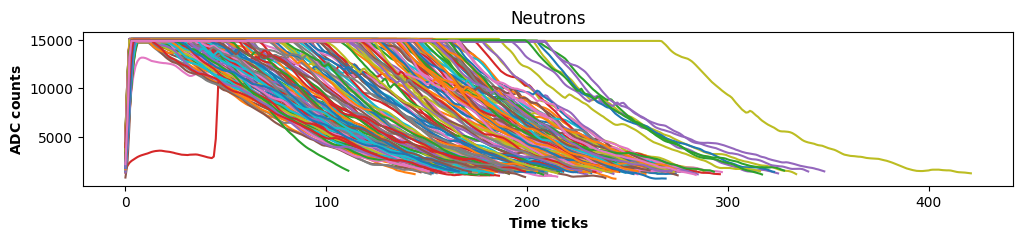

In [16]:
## draft

properties = n_peaks['properties']

fig, ax = plt.subplots(1, 1, figsize=(12, 2))

for trigger_idx in range(0, 2000):
    for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
        if properties[trigger_idx]['plateau_sizes'][i] > 5:
            l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
            r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
            ax.plot(n_data[trigger_idx][l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title('Neutrons')

In [17]:
trigger_idx = 12
properties[trigger_idx].keys()

dict_keys(['plateau_sizes', 'left_edges', 'right_edges', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])

In [18]:
properties[trigger_idx]['plateau_sizes']

array([ 1,  1,  1, 75,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1])